##### import the required libraries 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression





#ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("incomeData.csv.xls")
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



1.age: continuous. It denotes the age of the person.
2.workclass: It denotes the working class of the person. Sample values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,  Without-pay, Never-worked.
3.fnlwgt: continuous.
4.education: It denotes the educational qualification of the person. Sample 5.values: Bachelors, Somecollege, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
6.education-num: continuous. It denotes the quantitative values with reference to education.
marital-status: It denotes the marital status of the person. Sample values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.occupation: It denotes the occupation of a person. Sample values: Tech-support, Craft-repair, Otherservice, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8.relationship: It denotes the people present in the family. Sample values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: It denotes the person’s origins. Sample values: White, Asian-Pac-Islander, Amer-IndianEskimo, Other, Black.
9.sex: It denotes the person's gender. Sample values: Female, Male.
10.capital-gain: continuous. It denotes the monitory gains by the person.
11.capital-loss: continuous. It denotes the monitory loss by the person.
hours-per-week: continuous. It denotes the number of working hours per week by the person.
12.native-country: It denotes the country to which the person belongs. Sample 13.values: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands

In [3]:
df.shape
#checking the shape of the dataset

(32561, 15)

In [4]:
df.columns
#printing column names

Index(['nan', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [5]:
df.rename(columns={'nan':'age'},inplace=True)
#rename a column name

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [8]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [9]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


#### Positive corelation

capital_gain=hour_per_week
capital_losas=hours_per_week
hours_per_week=capital_gain,capital_loss

##### negative correlation

education_num = fnlwgt

##### checking unique values

In [10]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [13]:
cols=df.columns

In [14]:
#we can find some of the columns have error values (workclass,occupation,native-country)
for col in cols :
    print("{} : {}".format(cols,df[col].unique()))

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object') : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object') : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
    

some of the columns conatin error value

##### replace the error values

In [15]:
df['workclass'].replace(' ?',np.nan,inplace=True)

In [16]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df['workclass'].isna().sum()

1836

In [18]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
Income               0
dtype: int64

In [19]:
df['occupation'].replace(' ?',np.nan,inplace=True)

In [20]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
Income               0
dtype: int64

In [22]:
df['native-country'].replace(' ?',np.nan,inplace=True)

In [23]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

###### fill the replace values 

In [25]:
df['workclass'].fillna(method='ffill',inplace=True)

In [26]:
df['occupation'].fillna(method='ffill',inplace=True)

In [27]:
df['native-country'].fillna(method='ffill',inplace=True)

In [28]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [29]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
df.shape

(32561, 15)

##### checking duplicated values

In [31]:
df.duplicated().sum()
#this dataset contain 24 duplicated data so we are going to remove the duplicate

24

##### drope duplicated values

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [35]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [36]:
high=df[df['Income']==' >50K']

In [37]:
low=df[df['Income']==' <=50K']

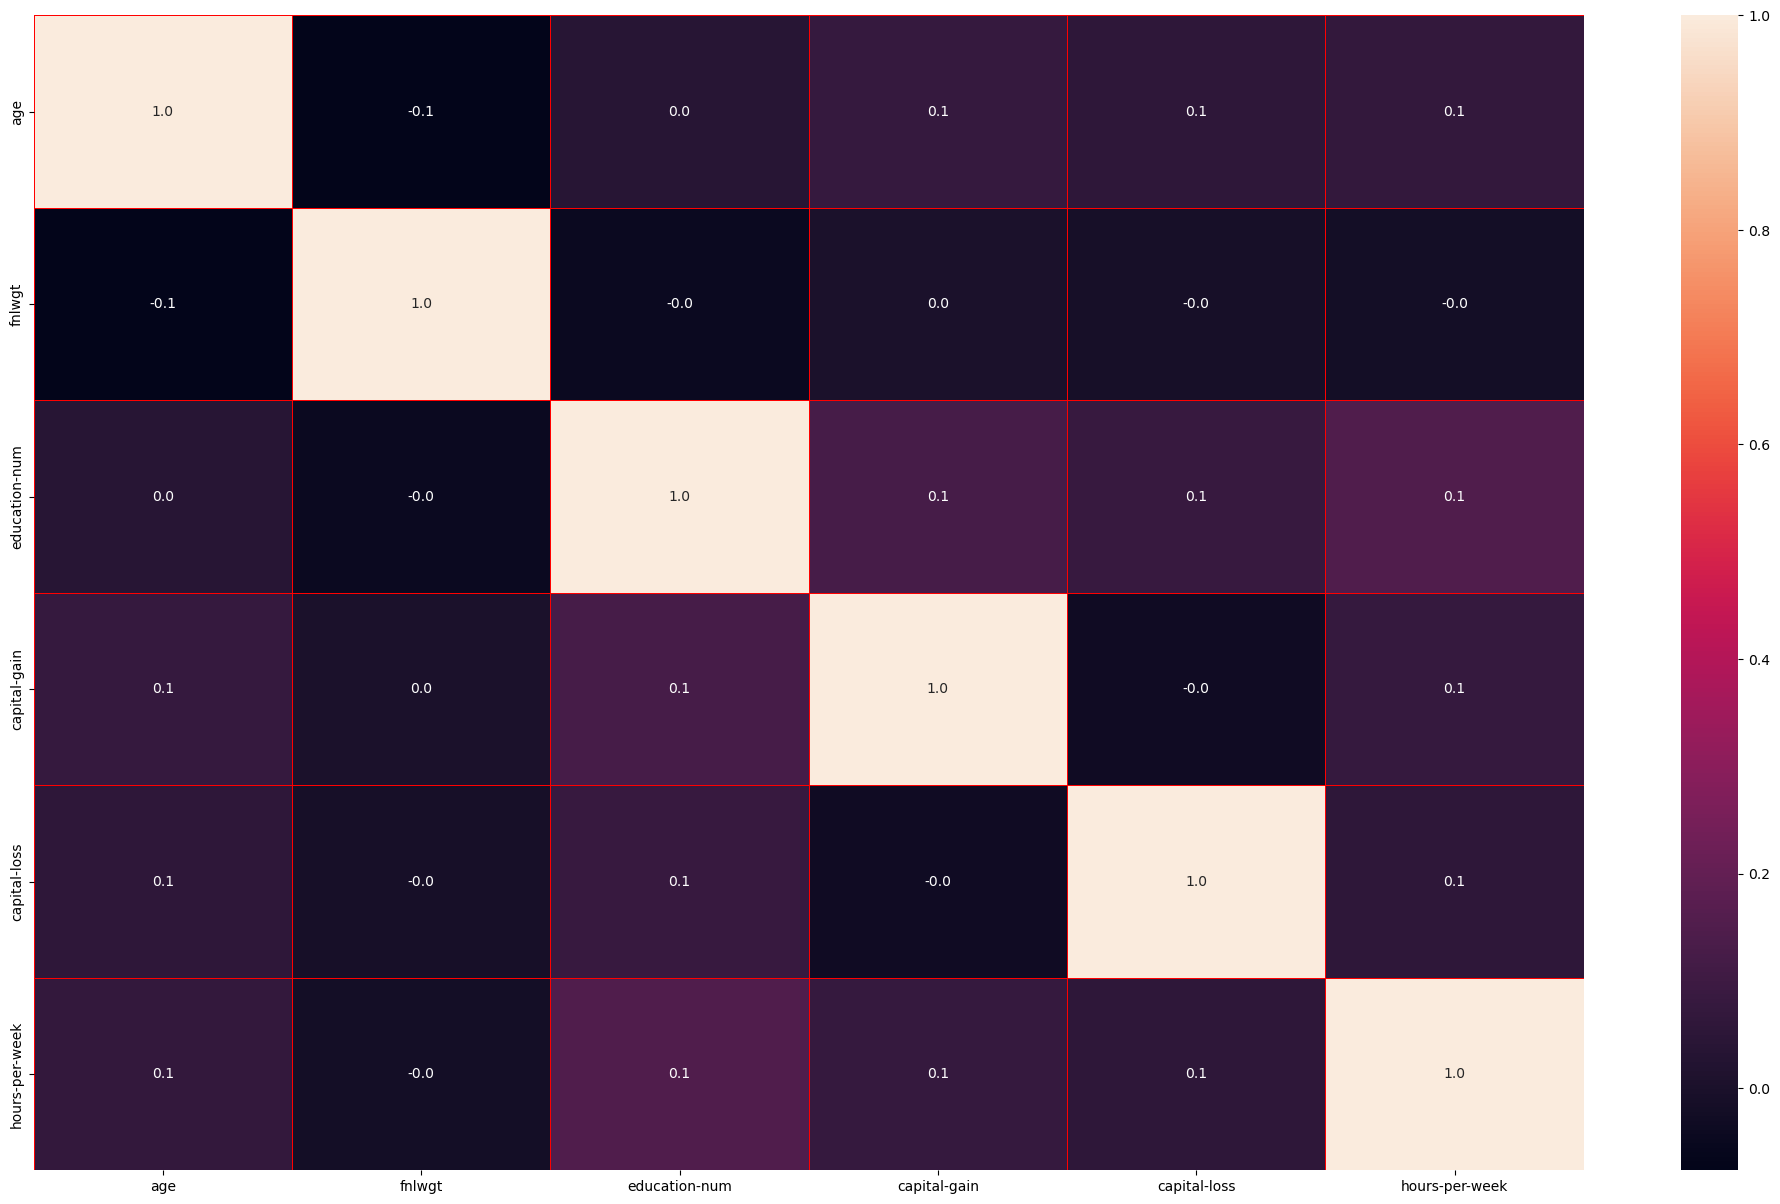

In [38]:
# Plotting the Heatmap of the columns using correlation matrix
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

##### importing the wordcloud

In [39]:
from wordcloud import WordCloud 

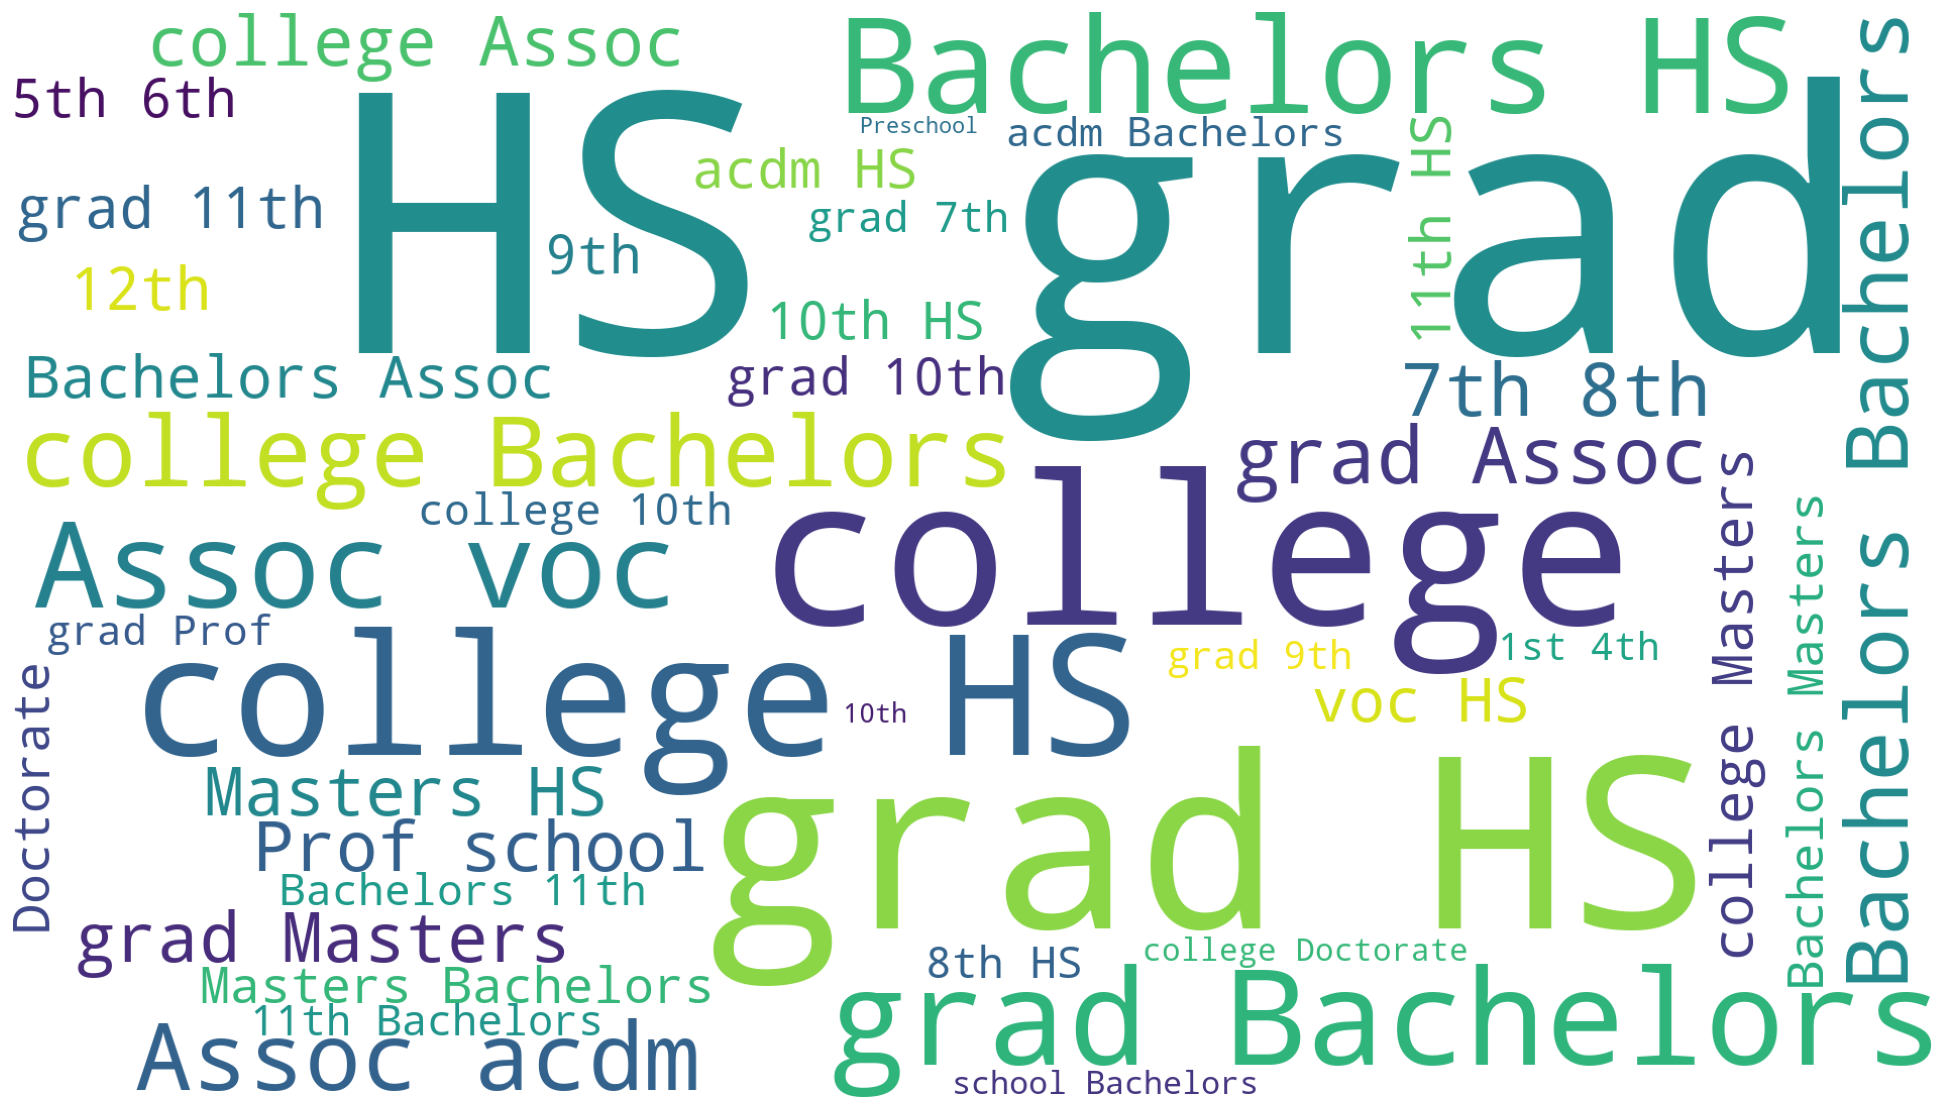

In [40]:
# Plotiing the wordcloud for the education  column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(df.education))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

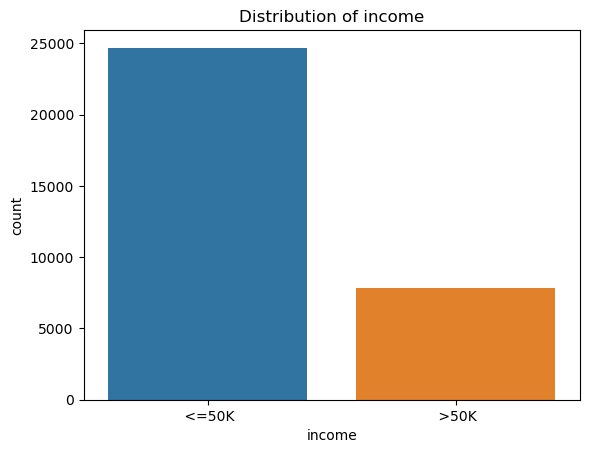

In [41]:
sns.countplot(x="Income",data=df)
plt.title("Distribution of income")
plt.xlabel("income")
plt.ylabel("count")
plt.show()
#visualization the distribution of income

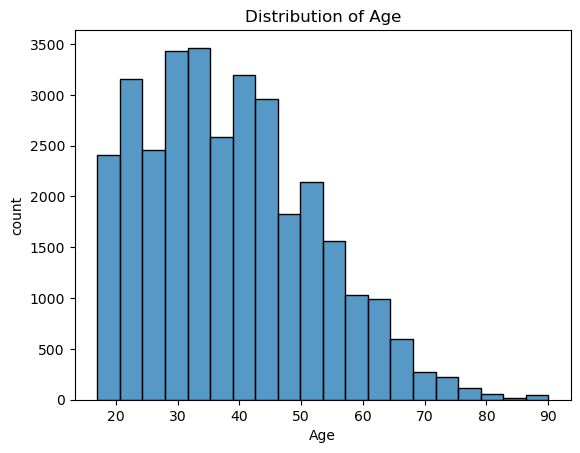

In [43]:
sns.histplot(df["age"],bins=20)
plt.title("Distribution of Age" )
plt.xlabel("Age")
plt.ylabel("count")
plt.show()
#visualize the distribution of age

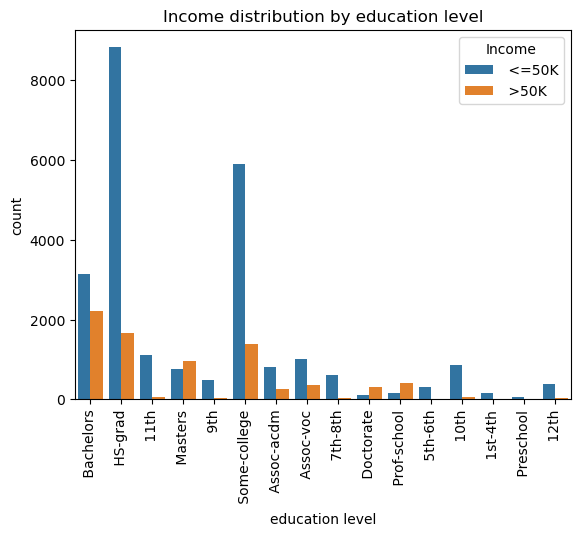

In [44]:
sns.countplot(x="education",hue="Income",data=df)
plt.title("Income distribution by education level")
plt.xlabel("education level")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.legend(title="Income",loc="upper right")
plt.show()

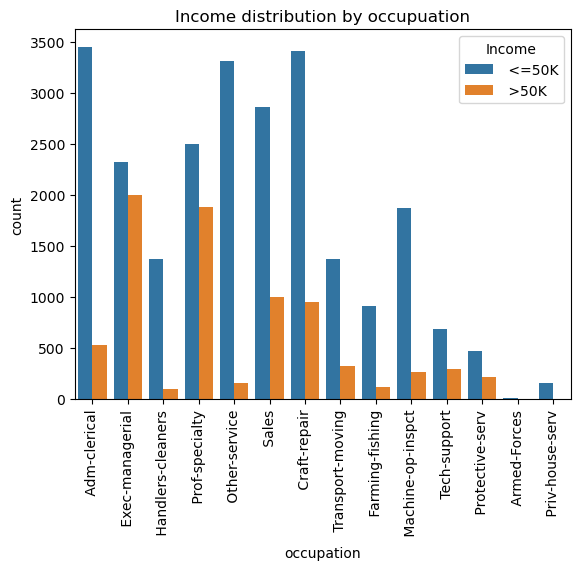

In [45]:
sns.countplot(x="occupation",hue="Income",data=df)
plt.title("Income distribution by occupuation")
plt.xlabel("occupation")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.legend(title="Income",loc="upper right")
plt.show()

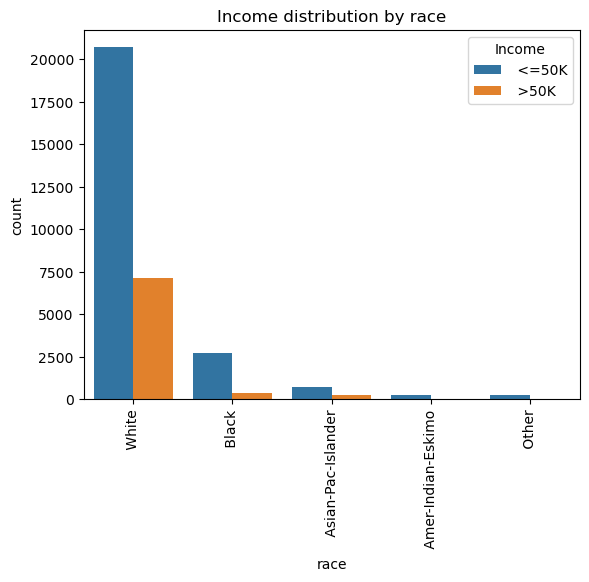

In [46]:
sns.countplot(x="race",hue="Income",data=df)
plt.title("Income distribution by race")
plt.xlabel("race")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.legend(title="Income",loc="upper right")
plt.show()

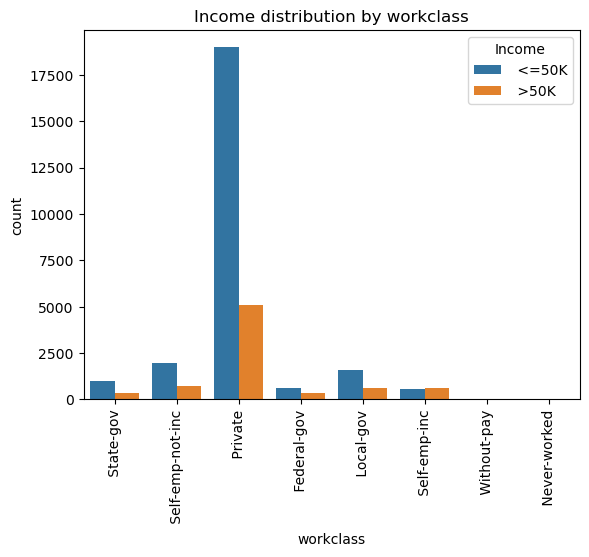

In [47]:
sns.countplot(x="workclass",hue="Income",data=df)
plt.title("Income distribution by workclass")
plt.xlabel("workclass")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.legend(title="Income",loc="upper right")
plt.show()

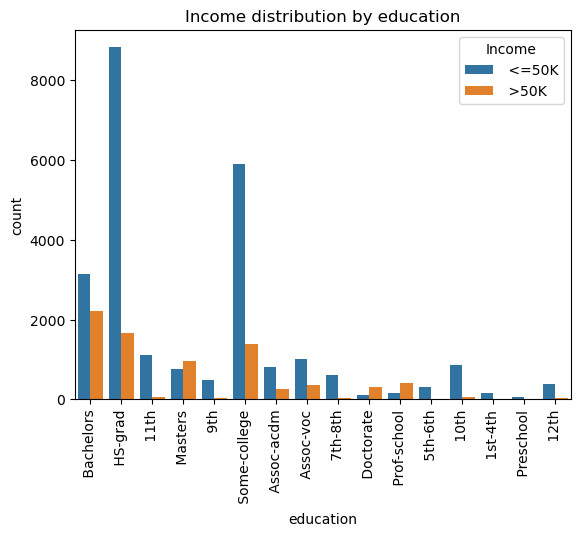

In [48]:
sns.countplot(x="education",hue="Income",data=df)
plt.title("Income distribution by education")
plt.xlabel("education")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.legend(title="Income",loc="upper right")
plt.show()

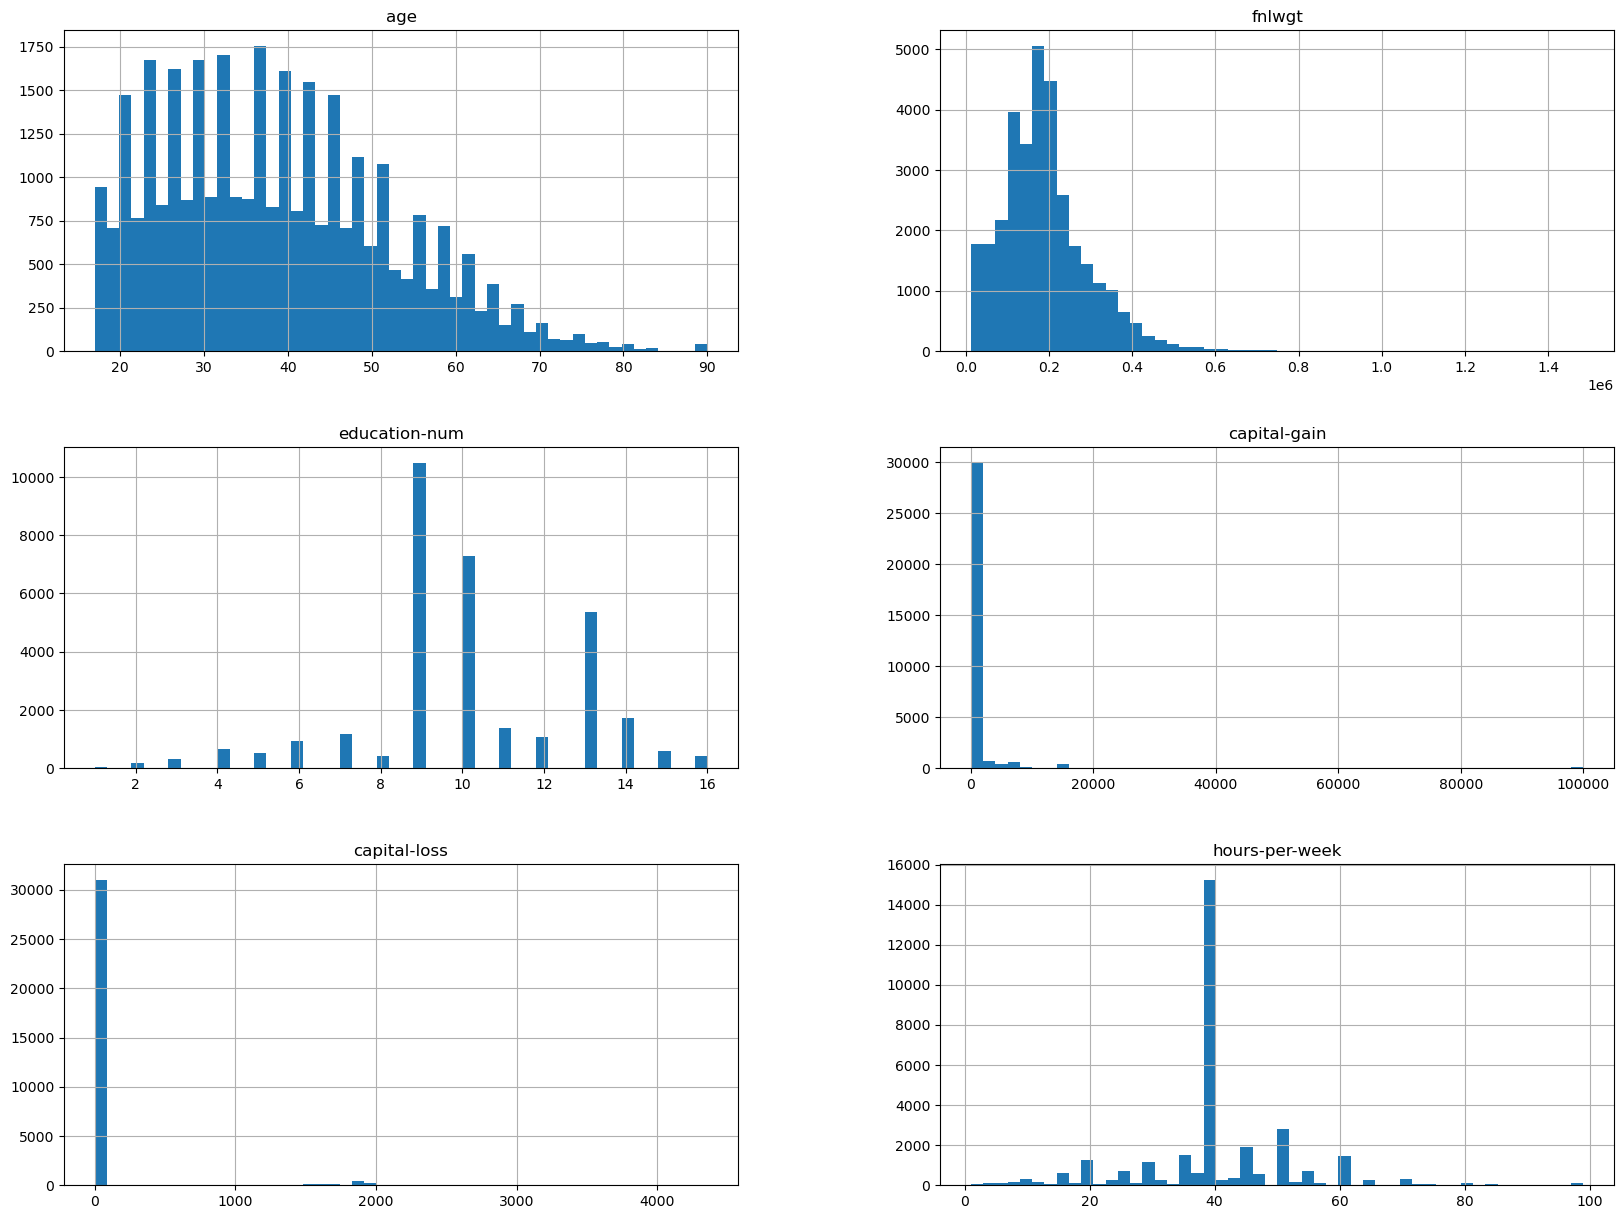

In [49]:
df.hist(bins=50,figsize=(20,15))
plt.show()

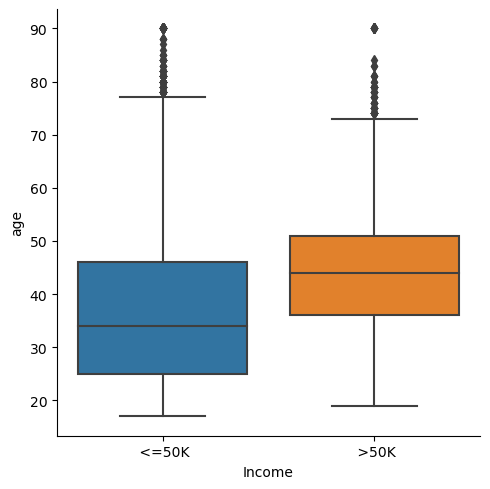

In [50]:
sns.catplot(data=df,x='Income',y='age',kind='box')

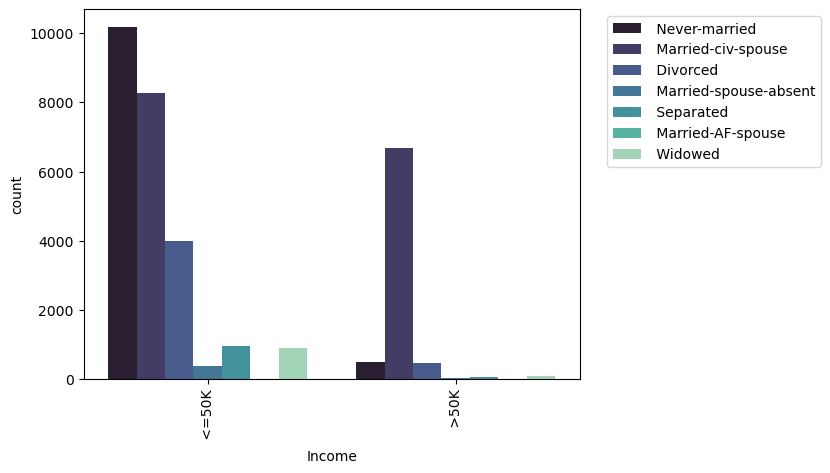

In [51]:
sns.countplot(x='Income',data=df,hue='marital-status',palette='mako')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
plt.show()

In [52]:
high

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,Private,287372,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [53]:
low

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<Axes: ylabel='sex'>

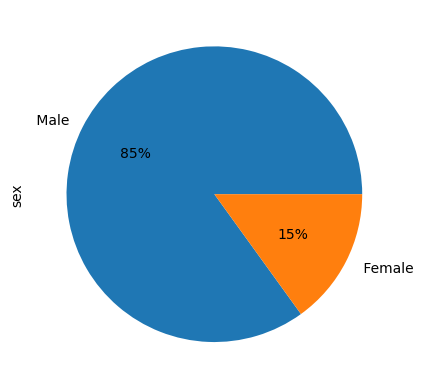

In [54]:
high['sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')

<Axes: ylabel='sex'>

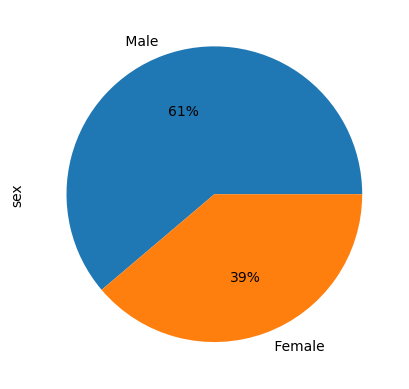

In [55]:
low['sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')

85 % of the male earn morthan 50k and only 15% of famale only earn morthan 50k

we can conclude that male are earning more 50 k income than female while compare with the lessthan 50k

39% female earn lowerthan 50k


61% male earn lowerthan 50k

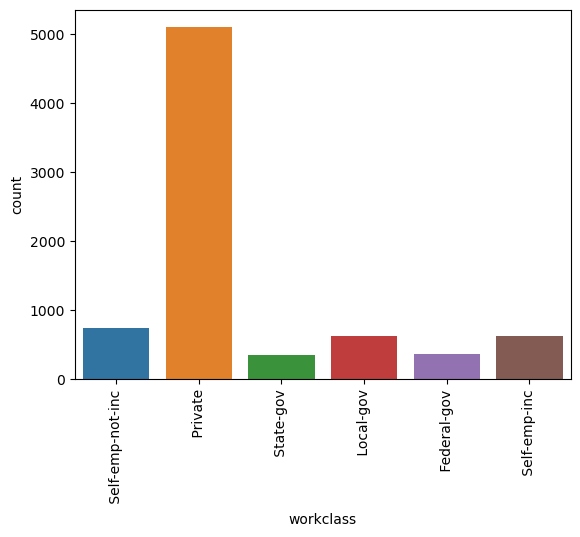

In [56]:
sns.countplot(x='workclass',data=high,)
plt.xticks(rotation=90)
plt.show()

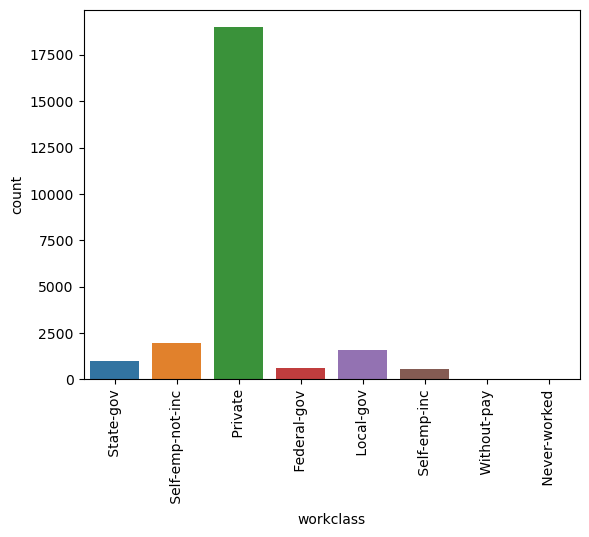

In [57]:
sns.countplot(x='workclass',data=low)
plt.xticks(rotation=90)
plt.show()

most of the people are working in the private sector

people who earn lesstrhan 50k mostly work in the private companies

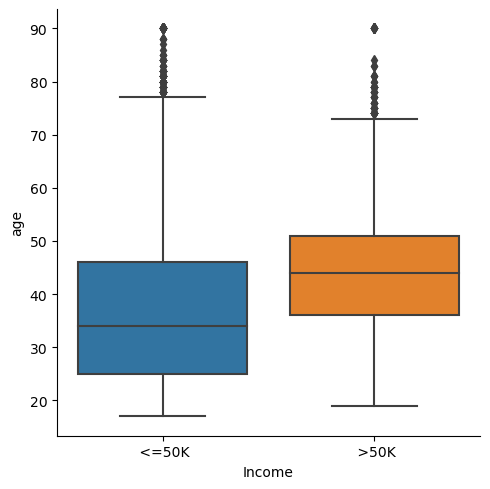

In [58]:
sns.catplot(data=df,x='Income',y='age',kind='box')

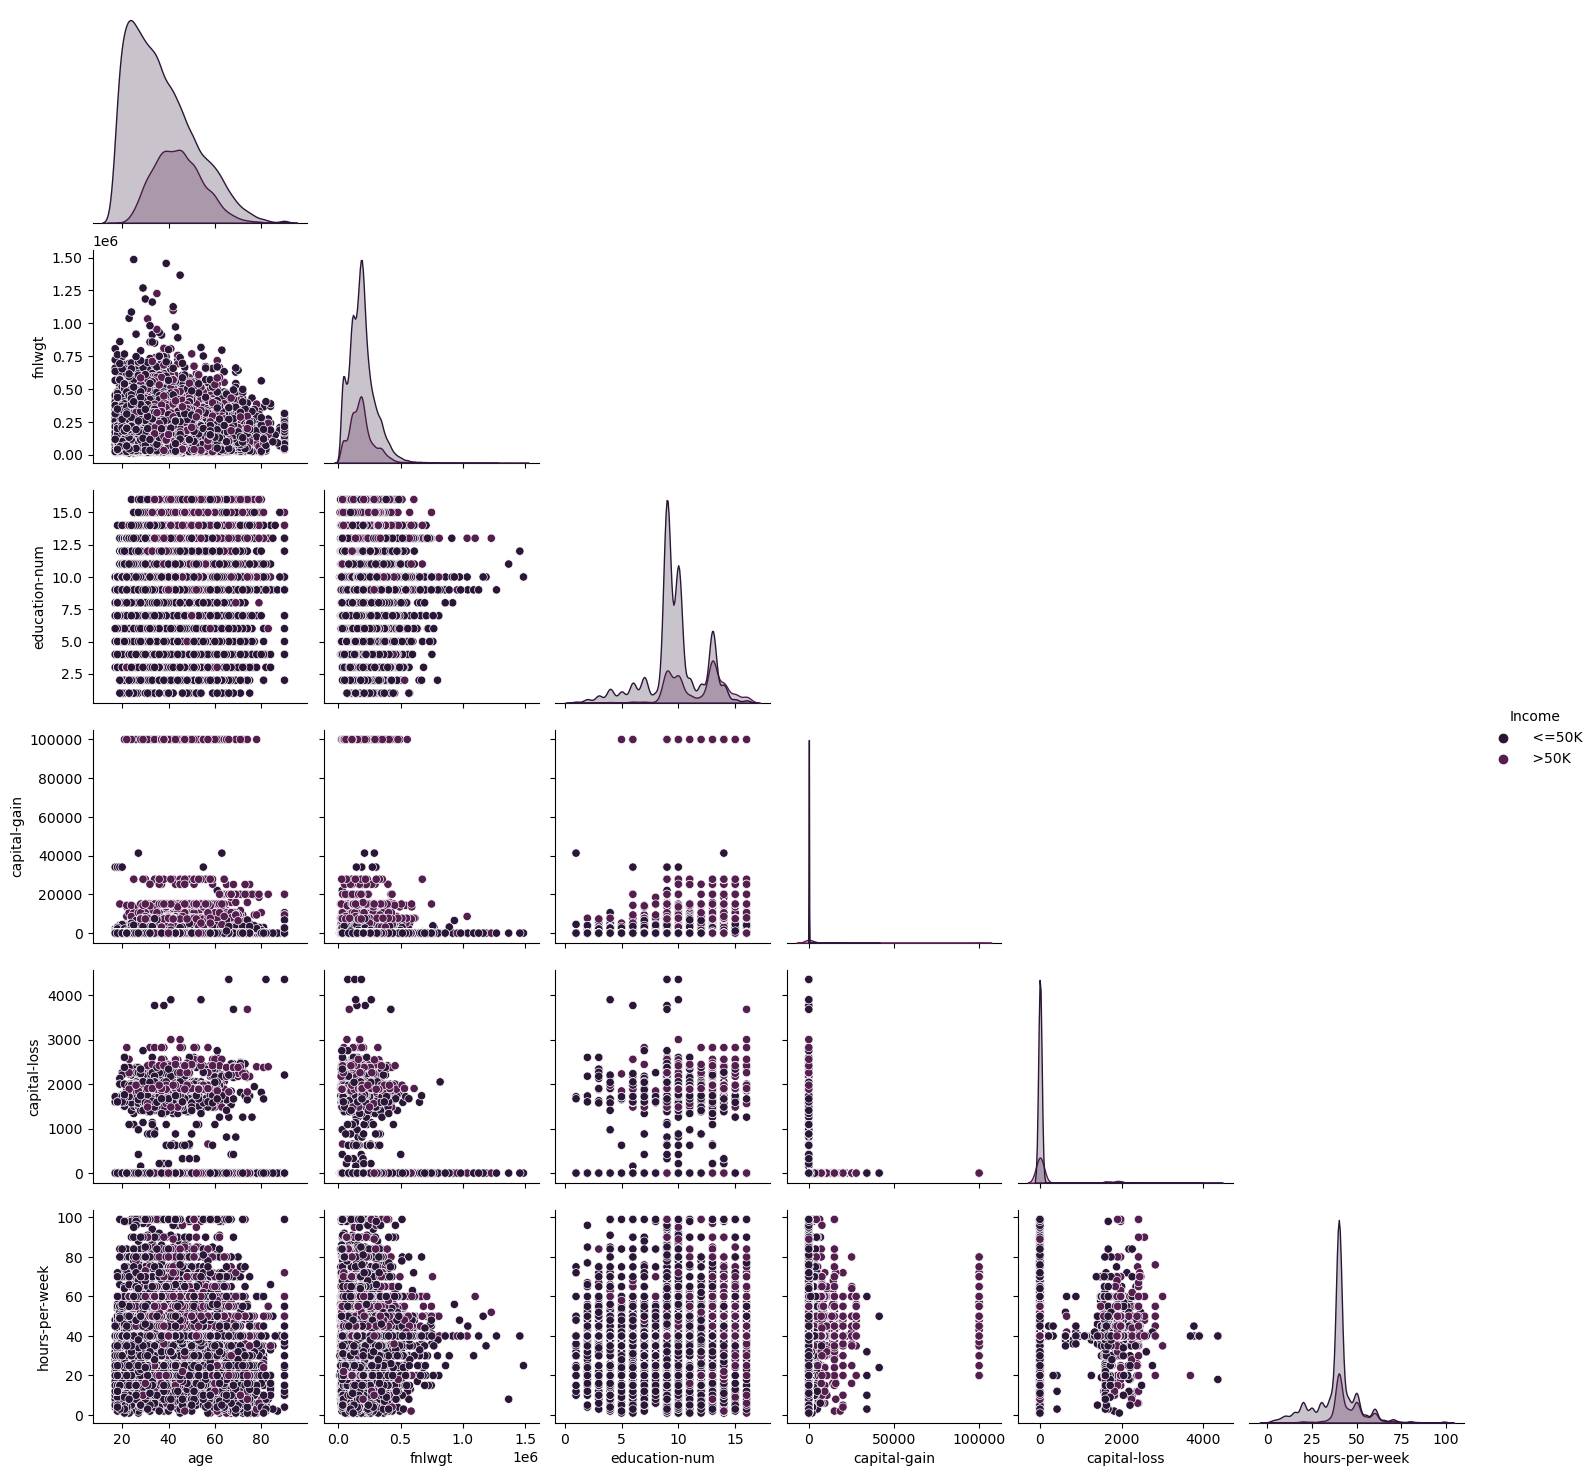

In [59]:
sns.set_palette(sns.color_palette("rocket", 8))
sns.pairplot(df, hue="Income",corner=True)
plt.show()

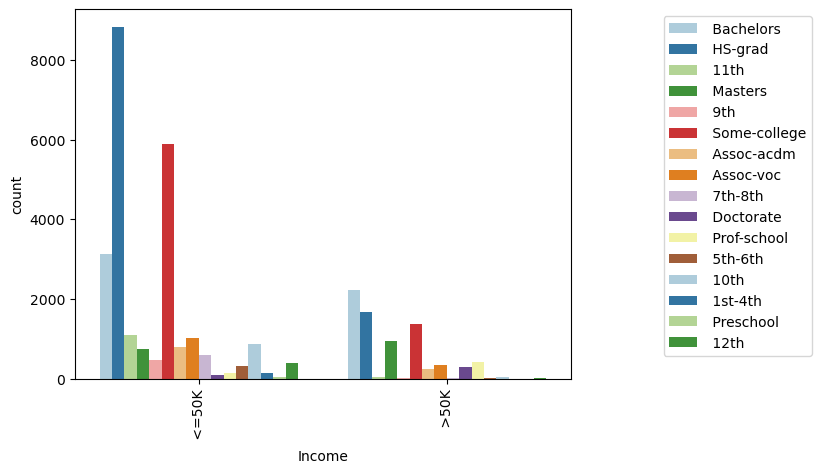

In [60]:
sns.countplot(x='Income',data=df,hue='education',palette='Paired')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
plt.show()

morethan 8000  educated people earn lessthan 50k income

nearly 3000 bachelors earn morethan 50k income

In [62]:
df_1=df.copy()

In [63]:
df.to_csv("final_project_income_prediction")

#### ENCODING DATA

In [5]:
label_enc=preprocessing.LabelEncoder()

In [6]:
S=df.copy()

In [67]:
for col in S:
    S[col]=label_enc.fit_transform(S[col].values)

In [68]:
S

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,22,6,2671,9,12,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,3,8080,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,3,7883,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,3,12881,11,8,4,0,3,4,1,0,0,19,38,0


### SMOTE OF DATASET

In [69]:
!pip install --upgrade imbalanced-learn scikit-learn

In [70]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(S.iloc[:,0:-1], S['Income'])

print('Original dataset shape', len(S))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 32537
Resampled dataset shape 49396


#### SPLITING THE DATA FOR TESTING AND TRAINING

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=42)

In [74]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
46840,33,3,3126,14,14,2,9,0,4,1,94,0,40,38
31675,21,3,20557,15,9,2,2,0,1,1,0,0,39,38
33103,28,3,2908,7,11,2,4,0,4,1,0,0,41,38
15914,18,3,2035,9,12,2,11,0,4,1,0,0,39,38
10065,11,5,5214,15,9,4,9,4,4,1,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7,6,16025,11,8,4,0,4,2,0,0,0,19,38
44732,30,3,7677,11,11,2,5,0,4,1,0,0,39,38
38158,19,3,9539,11,9,2,4,0,4,1,0,46,46,38
860,1,3,14130,1,6,4,0,3,4,0,0,0,19,38


In [75]:
logicreg=LogisticRegression()

In [76]:
logicreg

LogisticRegression()

In [77]:
logicreg.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_predict=logicreg.predict(x_test)

In [79]:
y_predict

array([0, 0, 1, ..., 1, 0, 1])

In [80]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [81]:
acc=accuracy_score(y_test,y_predict)

In [82]:
acc

0.7500202445542149

In [83]:
con=confusion_matrix(y_test,y_predict)

In [84]:
con

array([[4611, 1570],
       [1517, 4651]], dtype=int64)

In [85]:
f1=f1_score(y_test,y_predict)

In [86]:
f1

0.7508273468399387

In [87]:
pre=precision_score(y_test,y_predict)

In [88]:
pre

0.7476289985532872

In [89]:
recall=recall_score(y_test,y_predict)

In [90]:
recall

0.75405317769131

In [92]:
print("ACCURACY:",acc)
print("PRECISION:",pre)
print("RECALL:",recall)
print("F1 SCORE:",f1)

ACCURACY: 0.7500202445542149
PRECISION: 0.7476289985532872
RECALL: 0.75405317769131
F1 SCORE: 0.7508273468399387


## END
